Working on Fashion MNIST dataset

In [2]:
import  tensorflow as  tf
import  tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm 
import tqdm.auto
tqdm.tqdm  = tqdm.auto.tqdm

In [3]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

In [4]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [5]:
#  getting number of test and train examples
print(metadata.splits['train'].num_examples)
print(metadata.splits['test'].num_examples)

60000
10000


The value of each pixel in the image is integer from 0 to 255.We have to convert it into normalize value i.e b/w 0 and 1.

In [6]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

In [7]:
train_dataset =  train_dataset.map(normalize)
test_dataset =  test_dataset.map(normalize)

Here we  just take 1 image  and reshape it to 28*28 and plot  it

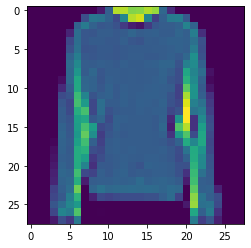

In [8]:
for image,label in train_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image)

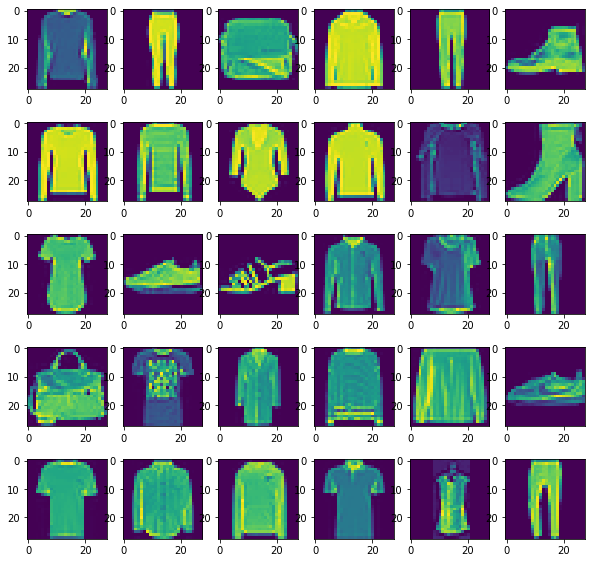

In [9]:
plt.figure(figsize=(10,10))
i = 0
for image,label in train_dataset.take(30):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,6,i+1)
    plt.imshow(image)
    plt
    i+=1
    

Building up our model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(metadata.splits['train'].num_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
training_examples = metadata.splits['train'].num_examples
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(training_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5


1707/1875 [==========================>...] - ETA: 2:54:25 - loss: 2.4817 - accuracy: 0.187 - ETA: 35:08 - loss: 2.0620 - accuracy: 0.3688  - ETA: 19:40 - loss: 1.8203 - accuracy: 0.447 - ETA: 13:43 - loss: 1.6808 - accuracy: 0.468 - ETA: 10:34 - loss: 1.5770 - accuracy: 0.492 - ETA: 8:36 - loss: 1.4921 - accuracy: 0.510 - ETA: 7:17 - loss: 1.4117 - accuracy: 0.52 - ETA: 6:19 - loss: 1.3401 - accuracy: 0.55 - ETA: 5:36 - loss: 1.2786 - accuracy: 0.57 - ETA: 4:46 - loss: 1.2066 - accuracy: 0.59 - ETA: 4:03 - loss: 1.1348 - accuracy: 0.61 - ETA: 3:36 - loss: 1.1035 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0630 - accuracy: 0.62 - ETA: 2:42 - loss: 1.0287 - accuracy: 0.64 - ETA: 2:24 - loss: 1.0032 - accuracy: 0.65 - ETA: 2:09 - loss: 0.9806 - accuracy: 0.66 - ETA: 1:58 - loss: 0.9477 - accuracy: 0.67 - ETA: 1:48 - loss: 0.9283 - accuracy: 0.67 - ETA: 1:40 - loss: 0.9162 - accuracy: 0.68 - ETA: 1:34 - loss: 0.9001 - accuracy: 0.68 - ETA: 1:28 - loss: 0.8817 - accuracy: 0.69 - ETA: 1:23 - loss

1875/1875 [==============================] - ETA: 1s - loss: 0.5019 - accuracy: 0.82 - ETA: 1s - loss: 0.5016 - accuracy: 0.82 - ETA: 1s - loss: 0.5011 - accuracy: 0.82 - ETA: 1s - loss: 0.5005 - accuracy: 0.82 - ETA: 1s - loss: 0.5001 - accuracy: 0.82 - ETA: 1s - loss: 0.4998 - accuracy: 0.82 - ETA: 1s - loss: 0.4996 - accuracy: 0.82 - ETA: 1s - loss: 0.4990 - accuracy: 0.82 - ETA: 0s - loss: 0.4986 - accuracy: 0.82 - ETA: 0s - loss: 0.4981 - accuracy: 0.82 - ETA: 0s - loss: 0.4980 - accuracy: 0.82 - ETA: 0s - loss: 0.4975 - accuracy: 0.82 - ETA: 0s - loss: 0.4971 - accuracy: 0.82 - ETA: 0s - loss: 0.4968 - accuracy: 0.82 - ETA: 0s - loss: 0.4961 - accuracy: 0.82 - ETA: 0s - loss: 0.4956 - accuracy: 0.82 - ETA: 0s - loss: 0.4951 - accuracy: 0.82 - ETA: 0s - loss: 0.4954 - accuracy: 0.82 - ETA: 0s - loss: 0.4948 - accuracy: 0.82 - ETA: 0s - loss: 0.4943 - accuracy: 0.82 - ETA: 0s - loss: 0.4941 - accuracy: 0.82 - ETA: 0s - loss: 0.4934 - accuracy: 0.82 - ETA: 0s - loss: 0.4930 - accura

1435/1875 [=====================>........] - ETA: 52s - loss: 0.7753 - accuracy: 0.750 - ETA: 18s - loss: 0.4779 - accuracy: 0.812 - ETA: 15s - loss: 0.4177 - accuracy: 0.835 - ETA: 13s - loss: 0.4108 - accuracy: 0.837 - ETA: 13s - loss: 0.4137 - accuracy: 0.841 - ETA: 12s - loss: 0.4075 - accuracy: 0.847 - ETA: 12s - loss: 0.4167 - accuracy: 0.848 - ETA: 12s - loss: 0.4064 - accuracy: 0.850 - ETA: 12s - loss: 0.4037 - accuracy: 0.851 - ETA: 12s - loss: 0.3967 - accuracy: 0.854 - ETA: 11s - loss: 0.3907 - accuracy: 0.855 - ETA: 11s - loss: 0.3857 - accuracy: 0.857 - ETA: 11s - loss: 0.3917 - accuracy: 0.855 - ETA: 11s - loss: 0.3890 - accuracy: 0.855 - ETA: 11s - loss: 0.3949 - accuracy: 0.853 - ETA: 11s - loss: 0.3918 - accuracy: 0.855 - ETA: 11s - loss: 0.3914 - accuracy: 0.855 - ETA: 11s - loss: 0.3931 - accuracy: 0.855 - ETA: 11s - loss: 0.3905 - accuracy: 0.856 - ETA: 11s - loss: 0.3907 - accuracy: 0.855 - ETA: 11s - loss: 0.3901 - accuracy: 0.855 - ETA: 11s - loss: 0.3876 - accur

1875/1875 [==============================] - ETA: 3s - loss: 0.3748 - accuracy: 0.86 - ETA: 3s - loss: 0.3749 - accuracy: 0.86 - ETA: 2s - loss: 0.3745 - accuracy: 0.86 - ETA: 2s - loss: 0.3746 - accuracy: 0.86 - ETA: 2s - loss: 0.3751 - accuracy: 0.86 - ETA: 2s - loss: 0.3747 - accuracy: 0.86 - ETA: 2s - loss: 0.3745 - accuracy: 0.86 - ETA: 2s - loss: 0.3746 - accuracy: 0.86 - ETA: 2s - loss: 0.3746 - accuracy: 0.86 - ETA: 2s - loss: 0.3746 - accuracy: 0.86 - ETA: 2s - loss: 0.3745 - accuracy: 0.86 - ETA: 2s - loss: 0.3741 - accuracy: 0.86 - ETA: 2s - loss: 0.3739 - accuracy: 0.86 - ETA: 2s - loss: 0.3738 - accuracy: 0.86 - ETA: 2s - loss: 0.3733 - accuracy: 0.86 - ETA: 2s - loss: 0.3732 - accuracy: 0.86 - ETA: 2s - loss: 0.3729 - accuracy: 0.86 - ETA: 2s - loss: 0.3730 - accuracy: 0.86 - ETA: 2s - loss: 0.3728 - accuracy: 0.86 - ETA: 2s - loss: 0.3726 - accuracy: 0.86 - ETA: 2s - loss: 0.3725 - accuracy: 0.86 - ETA: 1s - loss: 0.3722 - accuracy: 0.86 - ETA: 1s - loss: 0.3720 - accura

1556/1875 [=======================>......] - ETA: 41s - loss: 0.4654 - accuracy: 0.875 - ETA: 14s - loss: 0.3710 - accuracy: 0.893 - ETA: 12s - loss: 0.3575 - accuracy: 0.884 - ETA: 12s - loss: 0.3655 - accuracy: 0.877 - ETA: 11s - loss: 0.3479 - accuracy: 0.883 - ETA: 11s - loss: 0.3556 - accuracy: 0.874 - ETA: 11s - loss: 0.3551 - accuracy: 0.876 - ETA: 11s - loss: 0.3424 - accuracy: 0.881 - ETA: 11s - loss: 0.3535 - accuracy: 0.878 - ETA: 11s - loss: 0.3518 - accuracy: 0.878 - ETA: 11s - loss: 0.3484 - accuracy: 0.877 - ETA: 11s - loss: 0.3414 - accuracy: 0.880 - ETA: 11s - loss: 0.3400 - accuracy: 0.879 - ETA: 11s - loss: 0.3359 - accuracy: 0.880 - ETA: 11s - loss: 0.3368 - accuracy: 0.879 - ETA: 10s - loss: 0.3352 - accuracy: 0.881 - ETA: 10s - loss: 0.3316 - accuracy: 0.883 - ETA: 10s - loss: 0.3308 - accuracy: 0.882 - ETA: 10s - loss: 0.3309 - accuracy: 0.881 - ETA: 10s - loss: 0.3316 - accuracy: 0.880 - ETA: 10s - loss: 0.3331 - accuracy: 0.879 - ETA: 10s - loss: 0.3322 - accur

1875/1875 [==============================] - ETA: 2s - loss: 0.3366 - accuracy: 0.87 - ETA: 2s - loss: 0.3362 - accuracy: 0.87 - ETA: 1s - loss: 0.3361 - accuracy: 0.87 - ETA: 1s - loss: 0.3361 - accuracy: 0.87 - ETA: 1s - loss: 0.3355 - accuracy: 0.87 - ETA: 1s - loss: 0.3356 - accuracy: 0.87 - ETA: 1s - loss: 0.3353 - accuracy: 0.87 - ETA: 1s - loss: 0.3352 - accuracy: 0.87 - ETA: 1s - loss: 0.3352 - accuracy: 0.87 - ETA: 1s - loss: 0.3349 - accuracy: 0.87 - ETA: 1s - loss: 0.3353 - accuracy: 0.87 - ETA: 1s - loss: 0.3349 - accuracy: 0.87 - ETA: 1s - loss: 0.3348 - accuracy: 0.87 - ETA: 1s - loss: 0.3346 - accuracy: 0.87 - ETA: 1s - loss: 0.3343 - accuracy: 0.87 - ETA: 1s - loss: 0.3342 - accuracy: 0.87 - ETA: 1s - loss: 0.3341 - accuracy: 0.87 - ETA: 1s - loss: 0.3341 - accuracy: 0.87 - ETA: 1s - loss: 0.3342 - accuracy: 0.87 - ETA: 0s - loss: 0.3341 - accuracy: 0.87 - ETA: 0s - loss: 0.3340 - accuracy: 0.87 - ETA: 0s - loss: 0.3340 - accuracy: 0.87 - ETA: 0s - loss: 0.3340 - accura

1536/1875 [=======================>......] - ETA: 42s - loss: 0.2239 - accuracy: 0.906 - ETA: 15s - loss: 0.3370 - accuracy: 0.868 - ETA: 13s - loss: 0.3553 - accuracy: 0.876 - ETA: 12s - loss: 0.3629 - accuracy: 0.872 - ETA: 11s - loss: 0.3554 - accuracy: 0.869 - ETA: 11s - loss: 0.3516 - accuracy: 0.870 - ETA: 11s - loss: 0.3676 - accuracy: 0.869 - ETA: 11s - loss: 0.3677 - accuracy: 0.871 - ETA: 11s - loss: 0.3566 - accuracy: 0.872 - ETA: 11s - loss: 0.3496 - accuracy: 0.870 - ETA: 10s - loss: 0.3467 - accuracy: 0.870 - ETA: 10s - loss: 0.3476 - accuracy: 0.871 - ETA: 10s - loss: 0.3451 - accuracy: 0.872 - ETA: 10s - loss: 0.3405 - accuracy: 0.871 - ETA: 10s - loss: 0.3419 - accuracy: 0.870 - ETA: 10s - loss: 0.3357 - accuracy: 0.873 - ETA: 10s - loss: 0.3353 - accuracy: 0.874 - ETA: 10s - loss: 0.3398 - accuracy: 0.872 - ETA: 10s - loss: 0.3386 - accuracy: 0.873 - ETA: 10s - loss: 0.3369 - accuracy: 0.873 - ETA: 10s - loss: 0.3322 - accuracy: 0.875 - ETA: 10s - loss: 0.3297 - accur

1875/1875 [==============================] - ETA: 2s - loss: 0.3131 - accuracy: 0.88 - ETA: 2s - loss: 0.3132 - accuracy: 0.88 - ETA: 2s - loss: 0.3129 - accuracy: 0.88 - ETA: 2s - loss: 0.3128 - accuracy: 0.88 - ETA: 2s - loss: 0.3129 - accuracy: 0.88 - ETA: 1s - loss: 0.3129 - accuracy: 0.88 - ETA: 1s - loss: 0.3129 - accuracy: 0.88 - ETA: 1s - loss: 0.3131 - accuracy: 0.88 - ETA: 1s - loss: 0.3128 - accuracy: 0.88 - ETA: 1s - loss: 0.3128 - accuracy: 0.88 - ETA: 1s - loss: 0.3130 - accuracy: 0.88 - ETA: 1s - loss: 0.3127 - accuracy: 0.88 - ETA: 1s - loss: 0.3126 - accuracy: 0.88 - ETA: 1s - loss: 0.3128 - accuracy: 0.88 - ETA: 1s - loss: 0.3125 - accuracy: 0.88 - ETA: 1s - loss: 0.3126 - accuracy: 0.88 - ETA: 1s - loss: 0.3126 - accuracy: 0.88 - ETA: 1s - loss: 0.3124 - accuracy: 0.88 - ETA: 1s - loss: 0.3123 - accuracy: 0.88 - ETA: 1s - loss: 0.3124 - accuracy: 0.88 - ETA: 1s - loss: 0.3124 - accuracy: 0.88 - ETA: 1s - loss: 0.3124 - accuracy: 0.88 - ETA: 1s - loss: 0.3121 - accura

1480/1875 [======================>.......] - ETA: 41s - loss: 0.2938 - accuracy: 0.906 - ETA: 15s - loss: 0.2570 - accuracy: 0.923 - ETA: 14s - loss: 0.2810 - accuracy: 0.906 - ETA: 13s - loss: 0.2834 - accuracy: 0.901 - ETA: 13s - loss: 0.2750 - accuracy: 0.907 - ETA: 13s - loss: 0.2726 - accuracy: 0.903 - ETA: 13s - loss: 0.2670 - accuracy: 0.901 - ETA: 13s - loss: 0.2689 - accuracy: 0.903 - ETA: 12s - loss: 0.2759 - accuracy: 0.899 - ETA: 12s - loss: 0.2785 - accuracy: 0.898 - ETA: 12s - loss: 0.2887 - accuracy: 0.894 - ETA: 12s - loss: 0.2910 - accuracy: 0.894 - ETA: 12s - loss: 0.2939 - accuracy: 0.894 - ETA: 11s - loss: 0.2889 - accuracy: 0.895 - ETA: 11s - loss: 0.2896 - accuracy: 0.894 - ETA: 11s - loss: 0.2927 - accuracy: 0.894 - ETA: 11s - loss: 0.2991 - accuracy: 0.890 - ETA: 11s - loss: 0.3054 - accuracy: 0.888 - ETA: 11s - loss: 0.3073 - accuracy: 0.888 - ETA: 11s - loss: 0.3091 - accuracy: 0.887 - ETA: 11s - loss: 0.3090 - accuracy: 0.887 - ETA: 11s - loss: 0.3078 - accur

1875/1875 [==============================] - ETA: 2s - loss: 0.2960 - accuracy: 0.89 - ETA: 2s - loss: 0.2960 - accuracy: 0.89 - ETA: 2s - loss: 0.2957 - accuracy: 0.89 - ETA: 2s - loss: 0.2959 - accuracy: 0.89 - ETA: 2s - loss: 0.2956 - accuracy: 0.89 - ETA: 2s - loss: 0.2960 - accuracy: 0.89 - ETA: 2s - loss: 0.2959 - accuracy: 0.89 - ETA: 2s - loss: 0.2962 - accuracy: 0.89 - ETA: 2s - loss: 0.2965 - accuracy: 0.89 - ETA: 2s - loss: 0.2966 - accuracy: 0.89 - ETA: 2s - loss: 0.2966 - accuracy: 0.89 - ETA: 2s - loss: 0.2969 - accuracy: 0.89 - ETA: 2s - loss: 0.2969 - accuracy: 0.89 - ETA: 1s - loss: 0.2970 - accuracy: 0.89 - ETA: 1s - loss: 0.2970 - accuracy: 0.89 - ETA: 1s - loss: 0.2970 - accuracy: 0.89 - ETA: 1s - loss: 0.2972 - accuracy: 0.89 - ETA: 1s - loss: 0.2971 - accuracy: 0.89 - ETA: 1s - loss: 0.2971 - accuracy: 0.89 - ETA: 1s - loss: 0.2968 - accuracy: 0.89 - ETA: 1s - loss: 0.2966 - accuracy: 0.89 - ETA: 1s - loss: 0.2965 - accuracy: 0.89 - ETA: 1s - loss: 0.2965 - accura

Evaluate the accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps=math.ceil(metadata.splits['test'].num_examples/BATCH_SIZE))

313/313 [==============================] - ETA: 35s - loss: 0.2553 - accuracy: 0.875 - ETA: 3s - loss: 0.3464 - accuracy: 0.867 - ETA: 2s - loss: 0.3530 - accuracy: 0.86 - ETA: 2s - loss: 0.3559 - accuracy: 0.86 - ETA: 2s - loss: 0.3629 - accuracy: 0.86 - ETA: 1s - loss: 0.3657 - accuracy: 0.86 - ETA: 1s - loss: 0.3593 - accuracy: 0.86 - ETA: 1s - loss: 0.3650 - accuracy: 0.86 - ETA: 1s - loss: 0.3635 - accuracy: 0.86 - ETA: 1s - loss: 0.3563 - accuracy: 0.86 - ETA: 0s - loss: 0.3596 - accuracy: 0.86 - ETA: 0s - loss: 0.3677 - accuracy: 0.86 - ETA: 0s - loss: 0.3701 - accuracy: 0.86 - ETA: 0s - loss: 0.3663 - accuracy: 0.86 - ETA: 0s - loss: 0.3709 - accuracy: 0.86 - ETA: 0s - loss: 0.3719 - accuracy: 0.86 - ETA: 0s - loss: 0.3737 - accuracy: 0.86 - ETA: 0s - loss: 0.3729 - accuracy: 0.86 - ETA: 0s - loss: 0.3703 - accuracy: 0.86 - ETA: 0s - loss: 0.3699 - accuracy: 0.86 - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8645


In [15]:
print('accuracy on test data :',test_accuracy)

accuracy on test data : 0.8645


Prediction

In [16]:
for image,label in test_dataset.take(1):
    image = image.numpy()
    label = label.numpy()
    prediction = model.predict(image)

In [18]:
prediction.shape

(32, 10)

In [19]:
prediction[0]

array([4.3992968e-05, 1.0571389e-05, 1.5527538e-02, 8.3221693e-08,
       9.4727588e-01, 7.6189152e-11, 3.7136629e-02, 7.0900885e-12,
       5.3553781e-06, 2.7345719e-09], dtype=float32)

In [20]:
label[0]

4

In [21]:
np.argmax(prediction[0])

4

As above 2 values are same, hence we can say that the prediction was correct 